<a href="https://colab.research.google.com/github/CanoPablo/Deep_Learning/blob/main/Reto_1_Auto-Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import missingno as msno

En el caso de este ejercicio, nuestra base supervisada por un experto es directamente el data set, sólo cuenta con 6 celdas vacías, pero será la que utilizaremos como nuestra y_train.

In [2]:
y_train = pd.read_csv("https://raw.githubusercontent.com/contepablod/ML_Bourbaki/master/Semana1/Data/data.csv")

In [3]:
y_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
print(
    f"El número total de valores NaN en df es: {y_train.isna().sum().sum()}"
)

El número total de valores NaN en df es: 6


In [6]:
y_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Eliminar aleatoriamente el 10, 20 y 30
por ciento de las entradas en la matriz.

Tenemos 4,242 celdas.


In [7]:
# Copia del DataFrame original
A = y_train.copy()

In [8]:
# Número de celdas a borrar aleatoriamente
num_celdas_a_borrar = 424

# Seleccionar aleatoriamente las ubicaciones de las celdas que deseas borrar
filas_a_borrar = np.random.choice(y_train.index, num_celdas_a_borrar)
columnas_a_borrar = np.random.choice(y_train.columns, num_celdas_a_borrar)

# Borrar aleatoriamente las celdas seleccionadas estableciendo su valor como NaN
for fila, columna in zip(filas_a_borrar, columnas_a_borrar):
    A.at[fila, columna] = np.nan

In [9]:
print(
    f"El número total de valores NaN es: {A.isna().sum().sum()}"
)

El número total de valores NaN es: 420


In [10]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       281 non-null    float64
 1   sex       279 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  265 non-null    float64
 4   chol      276 non-null    float64
 5   fbs       269 non-null    float64
 6   restecg   266 non-null    float64
 7   thalach   277 non-null    float64
 8   exang     281 non-null    float64
 9   oldpeak   268 non-null    float64
 10  slope     276 non-null    float64
 11  ca        270 non-null    float64
 12  thal      273 non-null    float64
 13  num       271 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [11]:
B = y_train.copy()

In [12]:
# Número de celdas a borrar aleatoriamente
num_celdas_a_borrar = 849

# Seleccionar aleatoriamente las ubicaciones de las celdas que deseas borrar
filas_a_borrar = np.random.choice(y_train.index, num_celdas_a_borrar)
columnas_a_borrar = np.random.choice(y_train.columns, num_celdas_a_borrar)

# Borrar aleatoriamente las celdas seleccionadas estableciendo su valor como NaN
for fila, columna in zip(filas_a_borrar, columnas_a_borrar):
    B.at[fila, columna] = np.nan

In [13]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       255 non-null    float64
 1   sex       252 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  246 non-null    float64
 4   chol      245 non-null    float64
 5   fbs       243 non-null    float64
 6   restecg   254 non-null    float64
 7   thalach   243 non-null    float64
 8   exang     247 non-null    float64
 9   oldpeak   239 non-null    float64
 10  slope     249 non-null    float64
 11  ca        256 non-null    float64
 12  thal      241 non-null    float64
 13  num       252 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [14]:
C = y_train.copy()

In [15]:
# Número de celdas a borrar aleatoriamente
num_celdas_a_borrar = 1273

# Seleccionar aleatoriamente las ubicaciones de las celdas que deseas borrar
filas_a_borrar = np.random.choice(y_train.index, num_celdas_a_borrar)
columnas_a_borrar = np.random.choice(y_train.columns, num_celdas_a_borrar)

# Borrar aleatoriamente las celdas seleccionadas estableciendo su valor como NaN
for fila, columna in zip(filas_a_borrar, columnas_a_borrar):
    C.at[fila, columna] = np.nan

In [16]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

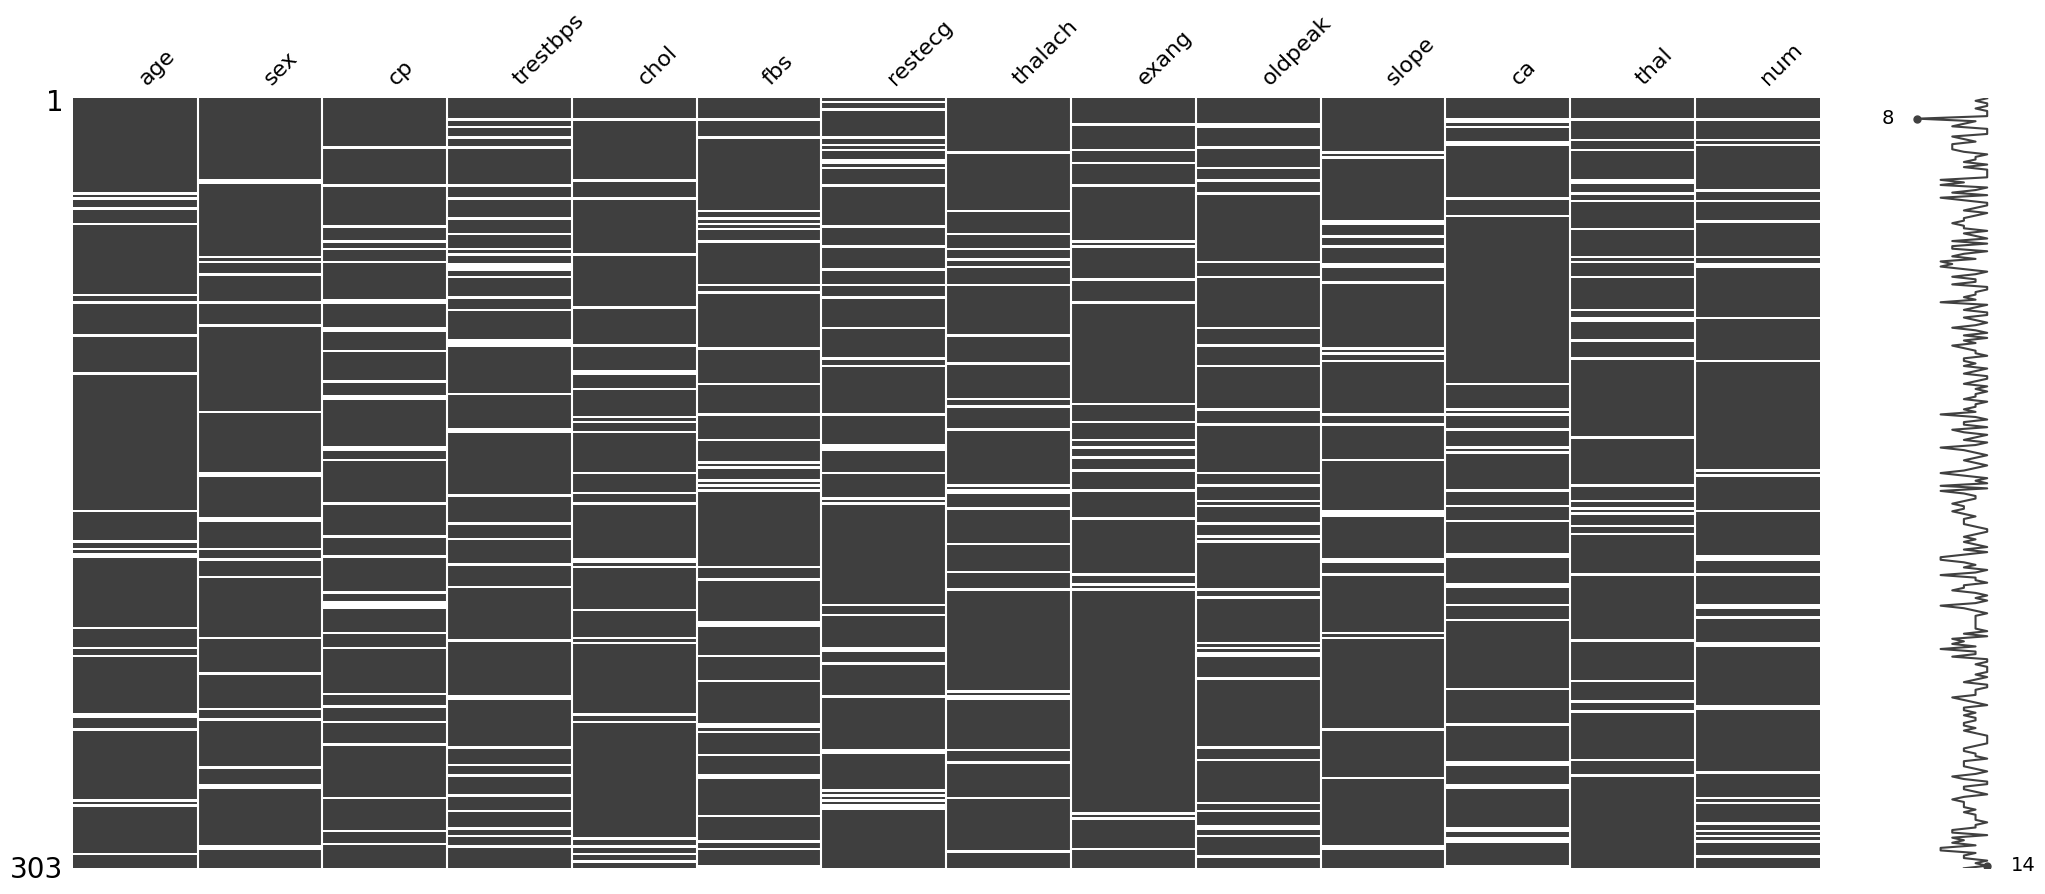

In [17]:
msno.matrix(A)
plt.show()

Corroboro que el borrado se realizó de manera aleatoria porque no tenemos columnas vacías ni registros completos vacíos.

## Preprocesamiento de datos.


In [18]:
# Preproccesing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Imputation
imputer = SimpleImputer(
    strategy="median"
)  # You can choose a different strategy if needed

array_imputed = imputer.fit_transform(y_train)

In [20]:
y_train_imputed = pd.DataFrame(array_imputed, columns=y_train.columns) # Convert to Dataframe

In [21]:
print(
    f"El número total de valores NaN en y_train_imputed es: {y_train_imputed.isna().sum().sum()}"
)

El número total de valores NaN en y_train_imputed es: 0


In [22]:
y_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


## Rellenar los datos con el promedio y muestreo gaussiano.

In [23]:
A.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,281.000000,279.000000,270.000000,265.000000,276.000000,269.000000,266.000000,277.000000,281.000000,268.000000,276.000000,270.000000,273.000000,271.000000
mean,54.402135,0.666667,3.170370,130.898113,245.344203,0.144981,0.988722,150.407942,0.320285,1.066418,1.605072,0.670370,4.670330,0.911439
std,9.237261,0.472252,0.948807,17.433016,51.167685,0.352738,0.996155,21.985906,0.467418,1.184699,0.614826,0.923994,1.931102,1.216970
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,209.750000,0.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.250000,0.000000,2.000000,166.000000,1.000000,1.650000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [24]:
# Definir la función para rellenar valores faltantes con media y distribución gaussiana por columna
def fill_missing_values(df):
    # Inicializar listas para almacenar DataFrames de media y distribución gaussiana por columna
    df_mean_list = []
    df_gaussian_list = []

    # Iterar sobre cada columna del DataFrame
    for column in y_train.columns:
        # Calcular la media y la desviación estándar de la columna actual
        column_mean = df[column].mean()
        column_std = df[column].std()

        # Rellenar valores faltantes de la columna con la media
        df_mean_column = df[column].fillna(column_mean)

        # Rellenar valores faltantes de la columna con distribución gaussiana
        df_gaussian_column = df[column].fillna(np.random.normal(column_mean, column_std))

        # Agregar DataFrames de columna a las listas respectivas
        df_mean_list.append(df_mean_column)
        df_gaussian_list.append(df_gaussian_column)

    # Concatenar los DataFrames de media y distribución gaussiana por columna en un solo DataFrame por cada tipo
    df_mean = pd.concat(df_mean_list, axis=1)
    df_gaussian = pd.concat(df_gaussian_list, axis=1)

    return df_mean, df_gaussian

In [25]:
df_list = [A, B, C]

# Iterar sobre cada DataFrame y aplicar la función fill_missing_values
result_mean = []
result_gaussian = []

for df in df_list:
    df_mean, df_gaussian = fill_missing_values(df)
    result_mean.append(df_mean)
    result_gaussian.append(df_gaussian)

# Los DataFrames resultantes con valores de media y distribución gaussiana por columna están en result_mean y result_gaussian respectivamente


In [26]:
A_mean = result_mean[0]
A_gaussian = result_gaussian[0]

B_mean = result_mean[1]
B_gaussian = result_gaussian[1]

C_mean = result_mean[2]
C_gaussian = result_gaussian[2]

In [27]:
A.shape

(303, 14)

In [28]:
A_mean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.402135,0.666667,3.170370,130.898113,245.344203,0.144981,0.988722,150.407942,0.320285,1.066418,1.605072,0.670370,4.670330,0.911439
std,8.894443,0.453098,0.895469,16.299377,48.826843,0.332289,0.933139,21.018196,0.450071,1.113936,0.586698,0.872051,1.832678,1.150690
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.402135,1.000000,3.170370,130.000000,245.344203,0.000000,0.988722,150.407942,0.000000,1.000000,1.605072,0.000000,3.000000,0.911439
75%,60.000000,1.000000,4.000000,140.000000,270.500000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [29]:
A_gaussian.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,53.770892,0.636280,3.166137,126.825805,238.570887,0.184559,1.033886,148.813511,0.318316,1.254681,1.528930,0.620371,4.883613,0.941062
std,9.177009,0.464831,0.895551,19.537197,53.428332,0.350500,0.940990,21.654990,0.450126,1.230099,0.635355,0.883739,1.942688,1.153925
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.750590,0.000000,3.000000,0.000000
25%,45.708199,0.000000,3.000000,112.000000,201.000000,0.000000,0.000000,131.826682,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,3.131503,128.000000,234.000000,0.000000,1.358584,150.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.500000,0.000000,2.000000,165.000000,1.000000,2.250000,2.000000,1.000000,7.000000,1.191931
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Entrenamiento modelo PCA y Auto-Encoder.

In [30]:
# Principal Component Analysis
from statsmodels.multivariate.pca import PCA

In [31]:
pca = PCA(y_train_imputed, standardize=True, normalize=True)

In [32]:
# Eigenvalues represent the variance explained by each principal component
eigenvalues = pca.eigenvals

# Total variance is the sum of all eigenvalues
total_variance = sum(eigenvalues)

# Calculate the explained variance ratio for each component
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

Cumulative Explained Variance Ratio: 0     0.261235
1     0.376350
2     0.464964
3     0.544494
4     0.615057
5     0.678987
6     0.740773
7     0.797253
8     0.848520
9     0.888848
10    0.921954
11    0.952172
12    0.977486
13    1.000000
Name: eigenvals, dtype: float64


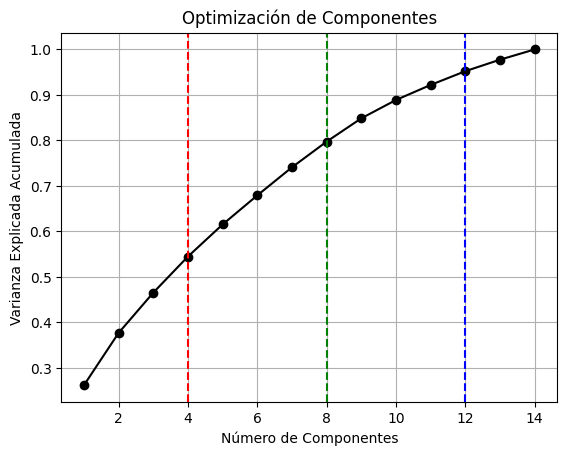

In [33]:
# Plot the cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance_ratio) + 1),
    cumulative_explained_variance_ratio,
    marker="o",
    color="black",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Optimización de Componentes")
plt.grid(True)

# Add vertical dashed lines
plt.axvline(x=4, color="r", linestyle="--", label="Line at 2")
plt.axvline(x=8, color="g", linestyle="--", label="Line at 3")
plt.axvline(x=12, color="b", linestyle="--", label="Line at 4")
plt.show()

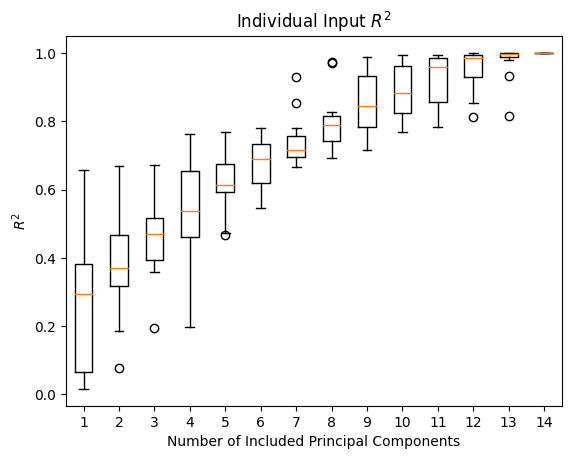

In [34]:
pca.plot_rsquare(15)
plt.show()

## Procedimiento

In [35]:
# Choose the optimal number of components based on the plot
optimal_components = 13

In [36]:
pca_model = PCA(data=y_train_imputed, ncomp=optimal_components, standardize=True, normalize=True) # Apply PCA with the optimal number of components

In [37]:
pca_model.factors.shape

(303, 13)

In [38]:
# PCA-transformed data (the principal component scores)
pca_transformed_data = pca_model.factors

In [39]:
# The loading matrix (eigenvectors)
loading_matrix = pca_model.loadings

El código de Pablo originalmente establece un:

y_train_imputed = imputer.fit_transform(y_train)

Que convierte y_train_imputed en un numpy.ndarray

Entonces:

In [40]:
print(type(y_train_imputed))

<class 'pandas.core.frame.DataFrame'>


In [41]:
# Convertir el DataFrame en un arreglo NumPy
y_train_imputed_array = y_train_imputed.values


In [42]:
# df_sin_nulos is the original data used to fit the PCA
data_mean = np.mean(y_train_imputed_array, axis=0)
data_std = np.std(y_train_imputed_array, axis=0)
data_std.shape

(14,)

In [43]:
# Inverse transformation
approx_original_data_standardized = np.dot(pca_transformed_data, loading_matrix.T)
approx_original_data_standardized.shape

(303, 14)

In [44]:
# If the data was standardized, you need to unstandardize it (reverse the scaling and centering)
approx_original_data = approx_original_data_standardized * data_std + data_mean

In [45]:
y_train_pca = pd.DataFrame(approx_original_data, columns=y_train.columns) # Convert to Dataframe

In [46]:
y_train_pca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,54.988382,0.697031,3.038216,131.892094,246.011330,0.195064,1.042550,149.856569,0.309021,1.096498,1.679365,0.609070,4.799220,0.878981
1,54.934428,0.708896,3.177723,133.192277,248.318698,0.134512,1.019705,147.987486,0.358185,1.007044,1.614705,0.761919,4.481025,1.007984
2,55.358241,0.691603,3.178017,130.503699,244.929037,0.139612,1.041286,149.746710,0.359233,1.110495,1.600944,0.691917,4.793309,0.934734
3,53.667129,0.706705,3.171910,131.674572,247.978743,0.143239,0.925466,152.171093,0.307234,1.193680,1.688291,0.626962,4.561192,0.919337
4,53.708429,0.635226,3.097578,131.650055,243.850814,0.142663,1.065128,150.219019,0.319024,1.113516,1.558047,0.640918,4.689775,0.928097


In [47]:
y_train_filled_pca = df.fillna(y_train_pca) # Retaining true data and filling original NaN values

In [48]:
y_train_filled_pca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000000,1.000000,1.000000,145.000000,233.000000,0.195064,2.000000,150.000000,0.000000,1.096498,3.000000,0.000000,4.799220,0.000000
1,54.934428,0.708896,4.000000,133.192277,286.000000,0.000000,2.000000,147.987486,0.358185,1.500000,1.614705,3.000000,4.481025,2.000000
2,67.000000,1.000000,4.000000,120.000000,244.929037,0.139612,2.000000,129.000000,0.359233,1.110495,2.000000,0.691917,7.000000,1.000000
3,37.000000,1.000000,3.171910,130.000000,250.000000,0.000000,0.000000,187.000000,0.000000,3.500000,3.000000,0.626962,3.000000,0.000000
4,41.000000,0.000000,3.097578,131.650055,204.000000,0.000000,2.000000,172.000000,0.000000,1.400000,1.558047,0.000000,4.689775,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.000000,0.690315,1.000000,110.000000,264.000000,0.000000,0.000000,147.793665,0.000000,1.200000,2.000000,0.634601,7.000000,0.953017
299,55.154612,0.692864,4.000000,144.000000,193.000000,0.196276,0.922126,141.000000,0.000000,3.400000,1.600408,0.706157,4.803269,2.000000
300,57.000000,1.000000,4.000000,131.816084,131.000000,0.000000,0.937112,148.026386,1.000000,1.200000,2.000000,1.000000,7.000000,3.000000
301,54.557197,0.640842,2.000000,130.000000,245.343078,0.000000,1.052496,174.000000,0.000000,0.000000,1.647431,0.715601,3.000000,1.000000


In [49]:
print(
    f"El número total de valores NaN en y_train lleno con PCA es: {y_train_filled_pca.isna().sum().sum()}"
)

El número total de valores NaN en y_train lleno con PCA es: 0


Es medio simbólico porque sólo llenamos 6 valores, pero bueno, al final tenemos una base que originalmente estaba incompleta, completa.

## PCA para A_mean, B_mean y C_mean.

In [50]:
# A_mean = imputer.fit_transform(A)  # Median imputing
new_data_standardized = (A_mean - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
A_mean_pca = pd.DataFrame(approx_new_data , columns=A.columns)
A_mean_filled_pca = A.fillna(A_mean_pca)

In [51]:
# Metrics
from sklearn.metrics import mean_squared_error

In [52]:
def normalized_mrse(y_true, y_pred):
    """Calcula el error cuadrático medio normalizado"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    range_y = np.max(y_true) - np.min(y_true)
    nrmse = rmse / range_y
    return nrmse

In [53]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, A_mean_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_A_m = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [54]:
print(f"Final NRMSE Score in training: {score_final_A_m}")

Final NRMSE Score in training: 3.117841339793835


In [55]:
# B_mean = imputer.fit_transform(B)  # Median imputing
new_data_standardized = (B_mean - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
B_mean_pca = pd.DataFrame(approx_new_data , columns=B.columns)
B_mean_filled_pca = B.fillna(B_mean_pca)

In [56]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, B_mean_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_B_m = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [57]:
print(f"Final NRMSE Score in training: {score_final_B_m}")

Final NRMSE Score in training: 3.478022612045807


In [58]:
# C_mean = imputer.fit_transform(C)  # Median imputing
new_data_standardized = (C_mean - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
C_mean_pca = pd.DataFrame(approx_new_data , columns=C.columns)
C_mean_filled_pca = C.fillna(C_mean_pca)

In [59]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, C_mean_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_C_m = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [60]:
print(f"Final NRMSE Score in training: {score_final_C_m}")

Final NRMSE Score in training: 0.0


## PCA para A_gaussian, B_gaussian y C_gaussian.

In [61]:
# A_gaussian = imputer.fit_transform(A)  # Median imputing
new_data_standardized = (A_gaussian - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
A_gaussian_pca = pd.DataFrame(approx_new_data , columns=A.columns)
A_gaussian_filled_pca = A.fillna(A_gaussian_pca)

In [62]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, A_gaussian_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_A_g = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [63]:
print(f"Final NRMSE Score in training: {score_final_A_g}")

Final NRMSE Score in training: 3.117841339793835


In [64]:
# B_gaussian = imputer.fit_transform(B)  # Median imputing
new_data_standardized = (B_gaussian - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
B_gaussian_pca = pd.DataFrame(approx_new_data , columns=B.columns)
B_gaussian_filled_pca = B.fillna(B_gaussian_pca)

In [65]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, B_gaussian_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_B_g = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [66]:
print(f"Final NRMSE Score in training: {score_final_B_g}")

Final NRMSE Score in training: 3.478022612045807


In [67]:
# C_gaussian = imputer.fit_transform(C)  # Median imputing
new_data_standardized = (C_gaussian - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
C_gaussian_pca = pd.DataFrame(approx_new_data , columns=C.columns)
C_gaussian_filled_pca = C.fillna(C_gaussian_pca)

In [68]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, C_gaussian_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final_C_g = np.mean(nrmse_values_pca)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: 

In [69]:
print(f"Final NRMSE Score in training: {score_final_C_g}")

Final NRMSE Score in training: 0.0


Guardando todo en una tabla.

In [70]:
resultados = {
    'DataFrame': ["A_mean", "B_mean", "C_mean", "A_gaussian", "B_gaussian", "C_gaussian"],
    'Error': [score_final_A_m, score_final_B_m, score_final_C_m, score_final_A_g, score_final_B_g, score_final_C_g]
}

# Crear un DataFrame
df_resultados = pd.DataFrame(resultados)

In [71]:
df_resultados

,DataFrame,Error
0,A_mean,3.117841
1,B_mean,3.478023
2,C_mean,0.000000
3,A_gaussian,3.117841
4,B_gaussian,3.478023
5,C_gaussian,0.000000


## Autoencoder.

In [72]:
BATCH_SIZE = 16

In [73]:
# Autoencoder Architecture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Utils
import os
import sys
from scipy.stats import zscore
from torchsummary import summary  # Display model summary
from tqdm.notebook import tqdm  # Display progress bar

In [120]:
x_train_imputed = B_mean

In [121]:
# Convert DataFrame to PyTorch tensor
minmax_scaler_ytrain = MinMaxScaler()
y_train_minmax = minmax_scaler_ytrain.fit_transform(y_train_imputed)
x_train_minmax = minmax_scaler_ytrain.transform(x_train_imputed)
x_train_tensor = torch.tensor(x_train_minmax, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_minmax, dtype=torch.float32)

# Define the ratio for splitting between training and validation sets
validation_ratio = 0.1

# Calculate the size of the validation set
validation_size = int(validation_ratio * len(x_train_tensor))
training_size = len(x_train_tensor) - validation_size

# Use random_split to create training and validation datasets
train_dataset, val_dataset = random_split(
    dataset=TensorDataset(y_train_tensor), lengths=[training_size, validation_size]
)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False) #Generally do not shuffle validation data

## Linear Autoencoder

In [122]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [123]:
# Set input and hidden size based on your data
input_size = x_train_minmax.shape[1]
hidden_size = int(input_size / 2)

In [124]:
input_size, hidden_size

(14, 7)

In [125]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [126]:
# Instantiate the model
model_ae = Autoencoder(input_size, hidden_size)
dev = "cuda" if device == "cuda:0" else "cpu"
summary(model_ae.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [16, 7]             105
            Linear-2                   [16, 14]             112
Total params: 217
Trainable params: 217
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [127]:
def train_eval(model, loader, optimizer, loss_func):
    total_loss_train = []
    total_loss_val = []

    # Model in training mode:
    if model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Train", total=len(loader)
        ):
            optimizer.zero_grad(set_to_none=True)

            # Forward pass
            input_data = data[0].to(device)
            output = model(input_data)
            loss_train = loss_func(output, input_data)

            # Check for NaN in loss
            if np.isnan(loss_train.item()):
                print("NaN loss value detected. Aborting training.")
                break

            # Backward pass and optimization
            loss_train.backward()
            optimizer.step()
            total_loss_train.append(loss_train.item())

        return total_loss_train

    # Model in evaluation mode:
    elif not model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Val", total=len(loader)
        ):
            input_data = data[0].to(device)
            outputs = model(input_data)
            loss_val = loss_func(outputs, input_data)
            total_loss_val.append(loss_val.item())
        return total_loss_val


def calc_loss(loss_list, total_loss):
    loss_list.append(sum(total_loss) / len(total_loss))
    return loss_list

In [128]:
# Hiperparámetros
EPOCHS = 100
LR = 0.0001

In [129]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model_ae.parameters(), lr=LR)

In [130]:
# Reset model parameters
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, "reset_parameters"):
            layer.reset_parameters()

In [110]:
reset_model_parameters(model_ae)

In [131]:
%%time

torch.cuda.empty_cache()

# Lists
loss_list_train = []
loss_list_val = []

# Training and Evaluation
for epoch in range(EPOCHS):
    # Train Iterations
    model = model_ae.train()
    total_loss_train = train_eval(model_ae, train_loader, optimizer, loss)

    # Val Iterations
    model = model.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model_ae, val_loader, optimizer, loss)

    # Calc Loss
    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)

    # Printing Metrics per Epoch
    print(
        f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n"
    )

Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.4968  Val Loss:0.5215



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.4839  Val Loss:0.5112



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.4825  Val Loss:0.5012



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.4752  Val Loss:0.4913



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.4702  Val Loss:0.4817



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.4609  Val Loss:0.4725



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.4501  Val Loss:0.4634



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.4478  Val Loss:0.4547



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.4354  Val Loss:0.4460



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.4362  Val Loss:0.4374



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.4134  Val Loss:0.4287



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.3972  Val Loss:0.4205



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.3964  Val Loss:0.4124



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.3788  Val Loss:0.4042



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.3871  Val Loss:0.3962



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.3868  Val Loss:0.3878



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.3738  Val Loss:0.3794



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.3666  Val Loss:0.3714



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.3586  Val Loss:0.3632



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.3442  Val Loss:0.3554



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.3303  Val Loss:0.3472



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.3244  Val Loss:0.3395



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.3248  Val Loss:0.3316



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.3208  Val Loss:0.3237



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.3035  Val Loss:0.3159



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.2929  Val Loss:0.3081



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.2983  Val Loss:0.3006



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.2866  Val Loss:0.2931



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.2809  Val Loss:0.2854



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.2800  Val Loss:0.2779



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.2637  Val Loss:0.2701



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.2483  Val Loss:0.2628



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.2460  Val Loss:0.2556



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.2353  Val Loss:0.2485



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.2319  Val Loss:0.2416



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.2252  Val Loss:0.2347



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.2168  Val Loss:0.2280



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.2087  Val Loss:0.2213



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.2100  Val Loss:0.2150



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.2047  Val Loss:0.2087



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.1941  Val Loss:0.2026



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.1887  Val Loss:0.1967



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.1843  Val Loss:0.1909



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.1836  Val Loss:0.1852



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.1747  Val Loss:0.1798



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.1701  Val Loss:0.1747



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.1627  Val Loss:0.1696



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.1614  Val Loss:0.1648



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.1595  Val Loss:0.1602



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.1501  Val Loss:0.1558



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.1480  Val Loss:0.1516



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.1502  Val Loss:0.1477



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.1379  Val Loss:0.1440



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.1349  Val Loss:0.1405



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.1325  Val Loss:0.1372



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.1285  Val Loss:0.1341



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.1263  Val Loss:0.1311



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.1228  Val Loss:0.1284



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.1209  Val Loss:0.1258



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.1243  Val Loss:0.1233



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.1174  Val Loss:0.1209



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.1145  Val Loss:0.1188



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.1115  Val Loss:0.1167



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.1100  Val Loss:0.1149



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.1092  Val Loss:0.1132



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.1072  Val Loss:0.1116



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.1041  Val Loss:0.1100



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.1050  Val Loss:0.1086



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.1081  Val Loss:0.1072



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.1008  Val Loss:0.1061



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.1051  Val Loss:0.1050



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0987  Val Loss:0.1040



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0995  Val Loss:0.1029



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0974  Val Loss:0.1019



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0950  Val Loss:0.1010



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0961  Val Loss:0.1002



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0955  Val Loss:0.0993



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0935  Val Loss:0.0987



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0926  Val Loss:0.0980



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0909  Val Loss:0.0974



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0909  Val Loss:0.0967



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0910  Val Loss:0.0961



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0894  Val Loss:0.0957



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0888  Val Loss:0.0952



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0905  Val Loss:0.0947



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0897  Val Loss:0.0941



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0892  Val Loss:0.0937



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0895  Val Loss:0.0933



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0879  Val Loss:0.0929



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0860  Val Loss:0.0925



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0853  Val Loss:0.0921



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0860  Val Loss:0.0917



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0860  Val Loss:0.0912



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0844  Val Loss:0.0909



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0841  Val Loss:0.0905



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0841  Val Loss:0.0901



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0828  Val Loss:0.0898



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0830  Val Loss:0.0894



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0829  Val Loss:0.0891



Epoch_Train:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/2 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0875  Val Loss:0.0888

CPU times: user 9.21 s, sys: 346 ms, total: 9.56 s
Wall time: 15.6 s


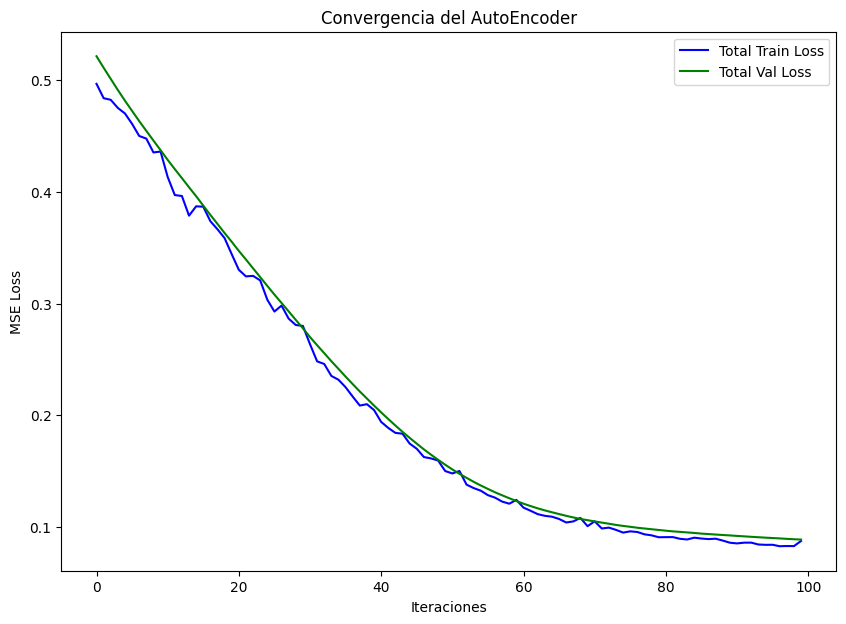

In [132]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [133]:
x_train = B

In [134]:
# Use the trained Autoencoder to fill missing values
model_ae.eval()
with torch.no_grad():
    filled_data_y = model_ae(y_train_tensor.to(device))
    filled_data_x = model_ae(x_train_tensor.to(device))

filled_data_y = minmax_scaler_ytrain.inverse_transform(filled_data_y.cpu().numpy())
filled_data_x = minmax_scaler_ytrain.inverse_transform(filled_data_x.cpu().numpy())

y_train_ae = pd.DataFrame(filled_data_y, columns=y_train.columns)
y_train_filled_ae = y_train.fillna(y_train_ae)
x_train_ae = pd.DataFrame(filled_data_x, columns=x_train.columns)
x_train_filled_ae = x_train.fillna(x_train_ae)

In [135]:
nrmse_values_ae = []

for column in y_train.columns:
    mrmse_col = normalized_mrse(y_train_filled_ae[column], x_train_filled_ae[column])
    nrmse_values_ae.append(nrmse_col)

score_final = np.mean(nrmse_values_ae)

In [136]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.0


In [138]:
score_final_B_m_ae = score_final

In [118]:
score_final_A_m_ae

0.0

In [119]:
score_final_A_g_ae

0.0

In [139]:
score_final_B_m_ae

0.0

In [55]:
print(type(A_mean))
print(dir(x))
help(x)

<class 'numpy.ndarray'>
